**Block-1 : Import Necessary Modules**

In [ ]:
# We need to impo
# rt the following libraries for our demo code to function correctly
import matplotlib.pyplot as plt
import tensorflow as tf

**Block-2 : Import all Module .py files**

In [2]:
#To load all the different modules required for complete functionality
#Architecture : Contains the complete architecture of model and all the helping functions to perform the task
#Data_Loading : Contains the functions to load and pre-process the data
#Test : Contains the functions to test the model and present the evaluation report as well as function for acatual prediction
#Train : Contains the functions to train the model, save it and produce training history

from Files import Architecture
from Files import Data_Loading
from Files import Test
from Files import Train


**Block-3 : Dataset Path and Hyper Parameters**

In [3]:
# path for input images/data
images_path = 'dataset'

# hyper parameters setting
#batch_size : General value is set as normally taken
#lr = learning rate : After testing and getting best results
#epochs : The optimal amount of epochs to attain best results

hyper_params = {"lr": 1e-4,"batch_size": 32,"epochs": 2}

**Block-4 : Load Dataset**

In [4]:
# Load images using the function present in Data_Loading module
trainX, testX, trainY, testY =Data_Loading.load_images_and_labels(images_path)

[INFO] Loading Images......
[INFO] Loaded


**Block-5 : Sample from Dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


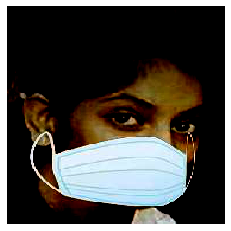

In [5]:
# view sample loaded image
plt.axis('off')
plt.imshow(trainX[2])


In [6]:
#If you already have a trained model present and want to use it directly then run this cell to load the saved model
model = tf.keras.models.load_model('classifier_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Block-7 : Build Model(if not loaded already)**

In [7]:
#build the model from Architecture file if not loaded already
model = Architecture.fine_tune_architecture()
model.summary()

C:\Users\Anoshpa Bansari\anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

**Block-8 : Train Model**

In [ ]:
#train model and get model as well as training history using the function training from the Train module
model, history = Train.training(model,trainX, testX, trainY, testY, hyper_params)


[INFO] compiling model...
[INFO] training head...
Epoch 1/2
35/35 [==============================] - 370s 11s/step - loss: 0.3867 - acc: 0.8336 - val_loss: 0.0844 - val_acc: 0.9638

**Block-9 : Model Training History**

In [ ]:
**Block-9 : Model Training History**

**Block-9 : Model Training History**

In [ ]:
#Plot the Accuracy history as well as Loss history of the Training and Validation Data
Train.plot_accuracy_history(history)
Train.plot_loss_history(history)

**Block-9 : Model Training History**

In [ ]:
#Plot the Accuracy history as well as Loss history of the Training and Validation Data
Train.plot_accuracy_history(history)
Train.plot_loss_history(history)

**Block-10 : Evaluate Model**

In [ ]:
#Evaluate the model on Test data and generate Precision , Recall , AUC and ROC Curve
Test.evalute_report(model,testX,testY,hyper_params)


**Block-11 : Sample Detections**

In [ ]:
#To check the result of testing our model on some sample images
plt.figure(figsize=(36,16))
for i in range(6):
    plt.subplot(2,3,i+1)
    Test.show_img(str(i+1)+".jpg")

**Block-12 : Difficult Sample Detection**

In [ ]:
#To check our model's result on a difficult sample image
Test.show_img("10.webp")